# Exercise 3 - Sort distances for K-nearest-neighbours classifier

## First, run the below cell in order to install all the relevant libraries.

In [25]:
!pip install numpy
!pip install matplotlib
!pip install sklearn
!pip install scipy


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-


  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


## What you should implement

Below is given the bubble-sort implementation of the sorting function we want. It should return the K closest distances in sorted order.

In [26]:
def k_nearest_bubble_sort(array, K):
    size = len(array)
    for i in range(size):
        min_idx = i
        for j in range(i+1, size):
            if array[j] < array[min_idx]:
                min_idx = j
        array[i], array[min_idx] = array[min_idx], array[i]
    return array[:K]

In [27]:
def k_nearest_mergesort(array, K):
    # TODO: Implement heapsort and return the K smallest values
    pass

In [28]:
def k_nearest_insertionsort(array, K):
    # TODO: Implement insertion sort and return the K smallest values
    pass

In [29]:
def parent(index):
    return (index - 1) // 2

def lChild(index):
    return index * 2 + 1

def rChild(index):
    return index * 2 + 2


def sink(arr, index, K):
 
    while(True):
        dest = index
        l = lChild(index)
        r = rChild(index)

        if(l < K and arr[dest] < arr[l]):
            dest = l
        if(r < K and arr[dest] < arr[r]):
            dest = r

        if(dest == index):
            break
        else:
            arr[index] , arr[dest] = arr[dest], arr[index]
            index = dest


def k_nearest_heapsort(array, K):
    for i in range(K//2 -1, -1, -1):
        sink(array, i, K)

    for i in range(K, len(array)):
        if(array[i] < array[0]):
            array[0] = array[i]
            sink(array, 0, K)


    return sorted(array[:K])

### Compare the speed

Once we have implemented the above and made sure it is correct, we can see the difference in speed for ourselves.

In [30]:
import random

# Change these parameters and see how the performance changes.
# Can you get formulas for the complexity of your algorithms?
K = 7
max_dist = 10000
num_points = 1000
array = [random.randint(0, max_dist) for i in range(num_points)]

%timeit k_nearest_bubble_sort(array, K)
# %timeit k_nearest_mergesort(array, K)
%timeit k_nearest_heapsort(array, K)
# We only copy the array here because timeit calls this function several times
# %timeit k_nearest_insertionsort(array.copy(), K)

9.3 ms ± 279 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
18.9 μs ± 140 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


## Dividing space into partitions

We will use our efficient implementation of sorting to create a K-nearest-neighbour (KNN) classifier. We first generate some data that represents measurements of the weight and size of various apples. Each apple comes from one of three different types - red, green, yellow. We will want to guess a type for the grid of gray points shown below.

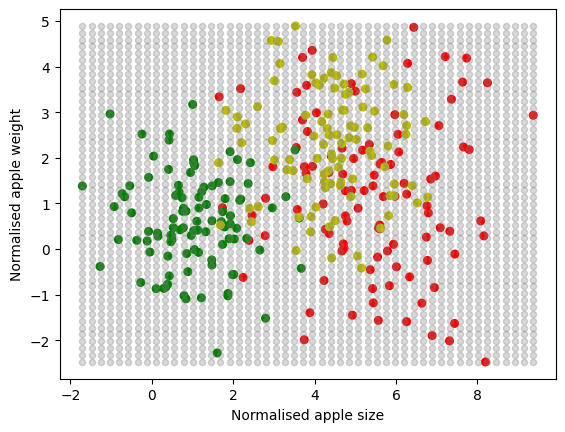

In [31]:
from lab3_helpers import generate_data, plot_grid

# You can change these parameters to generate new datasets
seed = 0
num_classes = 3
num_points_per_class = 100

data, labels = generate_data(num_classes, num_points_per_class, seed)
colours = ['r', 'g', 'y', 'b', 'teal']
x, y = data[:, 0], data[:, 1]

plot_grid(x, y, colours, labels)

Below we use the provided `knn` function to do just that. The KNN classifier finds the K closest points to our point of interest and uses majority voting to decide what label to assign it. That is, if K=3 and we have the three closest point being \[red, red, blue\], then KNN says that this apple is red.

It currently uses the slow `k_nearest_bubble_sort` sorting algorithm. You can run the cell and see how long it takes. You should replace it with your implementation of `merge_sort` and `insertion_sort` and compare the speed.

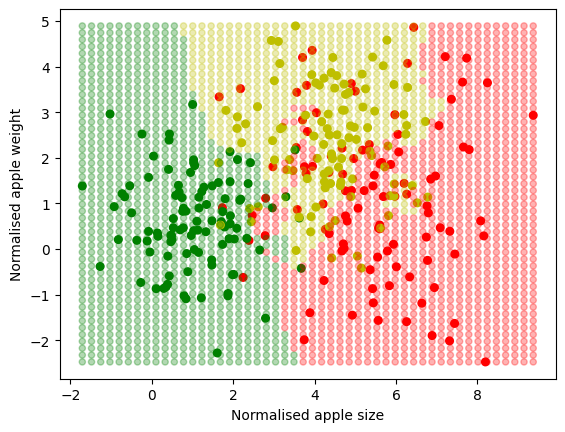

In [39]:
from lab3_helpers import get_grid, knn

# You can change this to see how it affects the partition of the space
K = 9

new_data = get_grid(x, y)

# TODO: replace k_nearest_bubble_sort with your implementations
# preds = knn(data, labels, new_data, K, 10, sort_function=k_nearest_bubble_sort)

preds = knn(data, labels, new_data, K, 10, sort_function=k_nearest_heapsort)

plot_grid(x, y, colours, labels, preds)

## Recognising hand-written digits

We first load a dataset of digits. This will take a few minutes to load the first time you run this cell.

In [33]:
from lab3_helpers import get_image_data, knn, plot_images

X_train, X_test, y_train, y_test = get_image_data(num_train=3000, num_test=40)

Let's see what some of these digits look like.

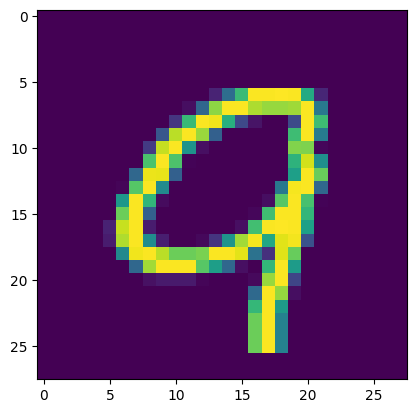

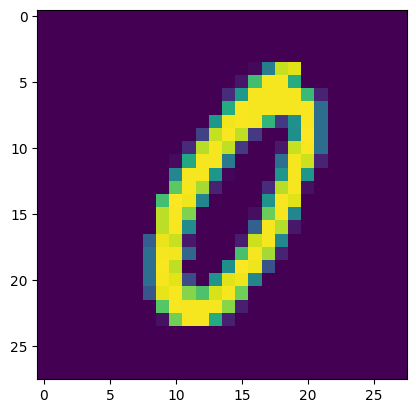

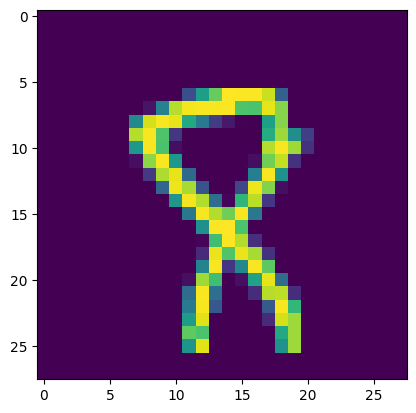

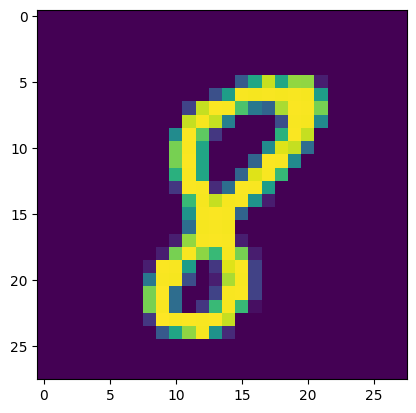

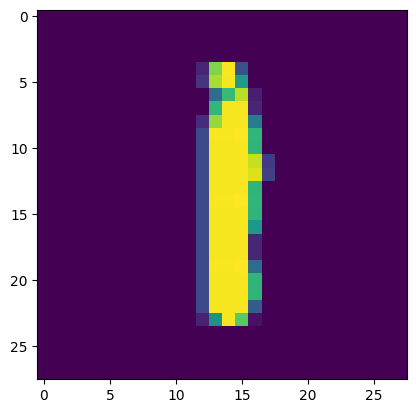

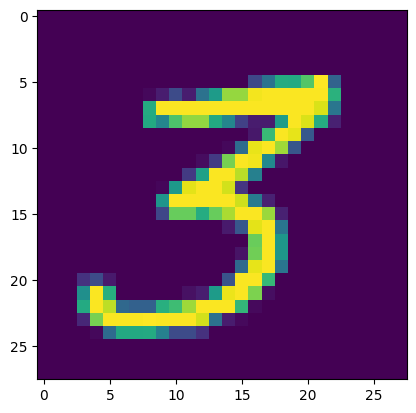

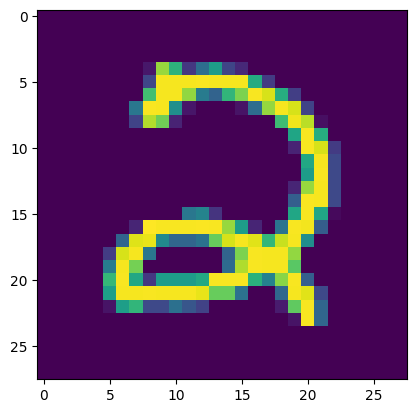

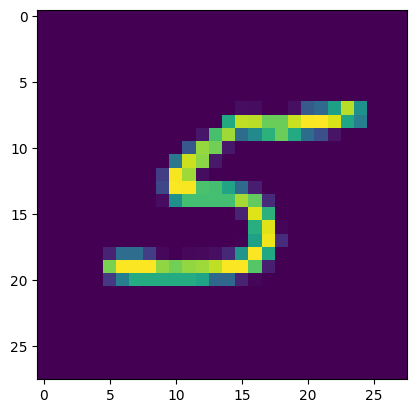

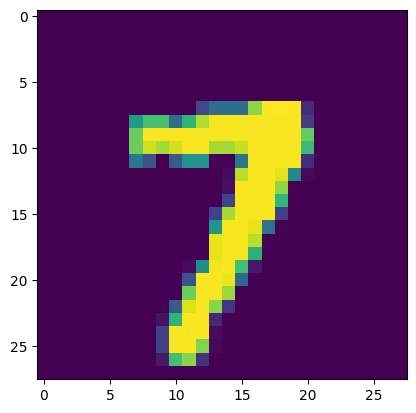

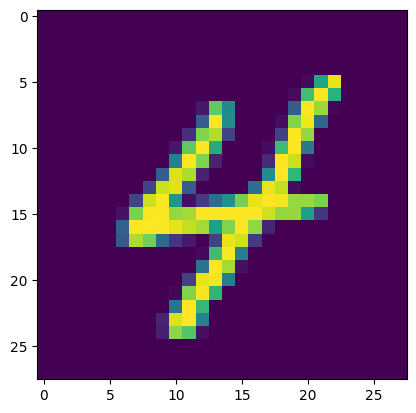

In [41]:
plot_images(X_test, num_images=10)

We will concatenate all the pixel values for a single image into one 28x28=784 long vector. We will use our KNN classifier again and this time the distance will be the Euclidean distance between those 784-dimensional vectors.

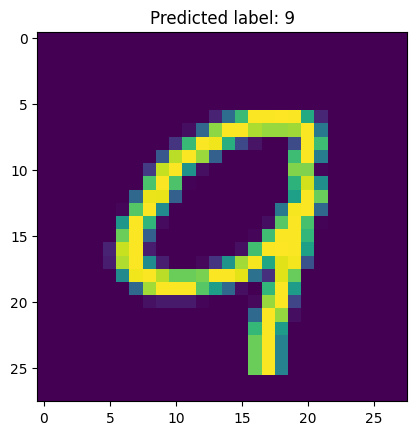

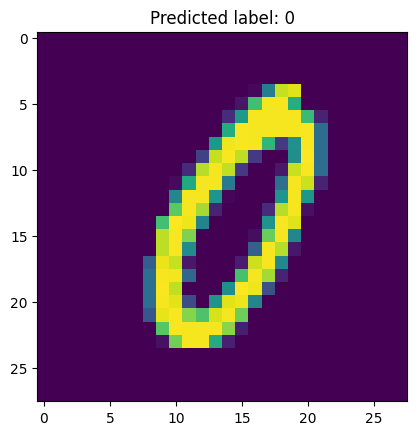

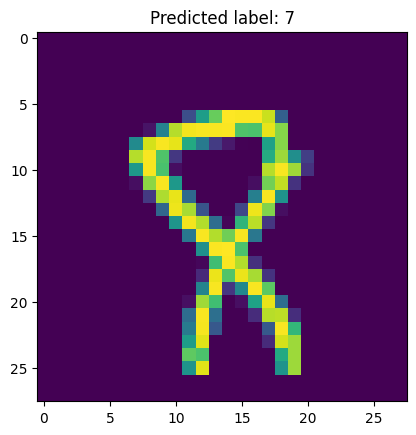

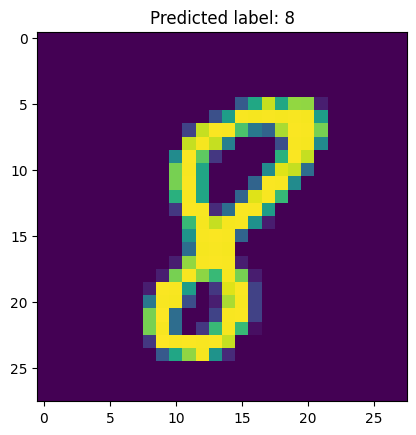

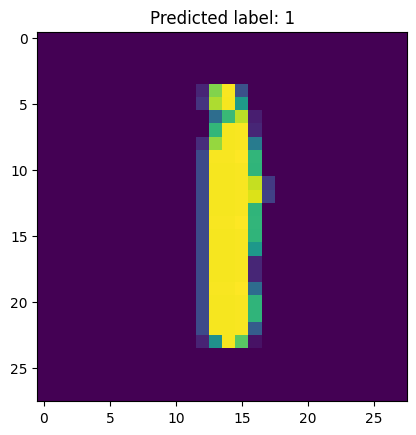

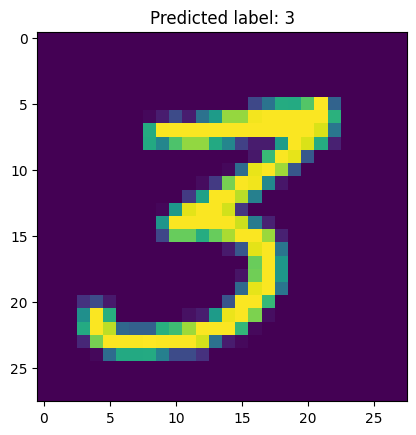

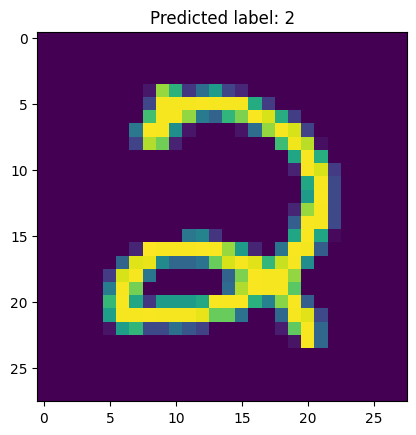

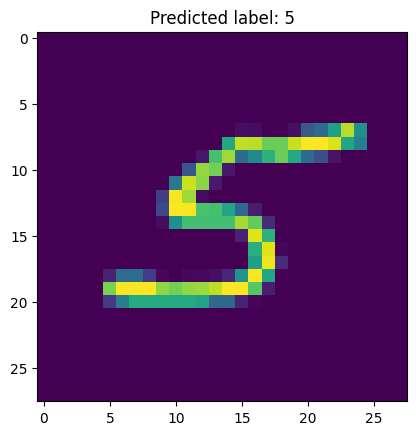

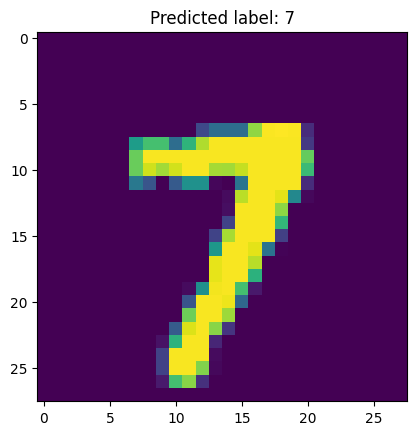

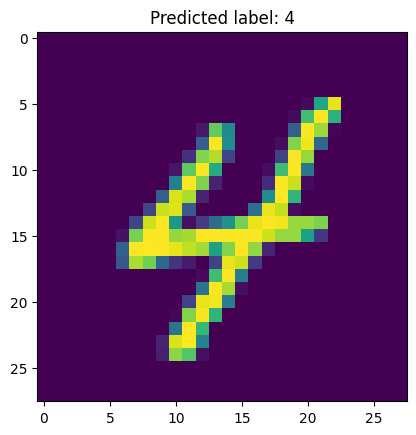

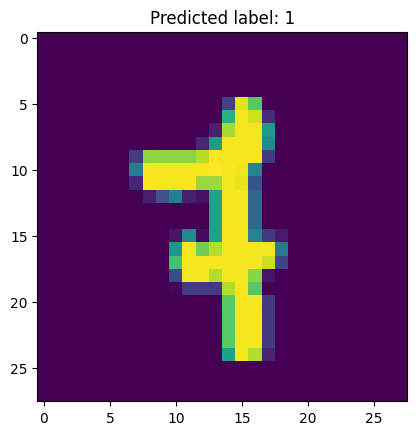

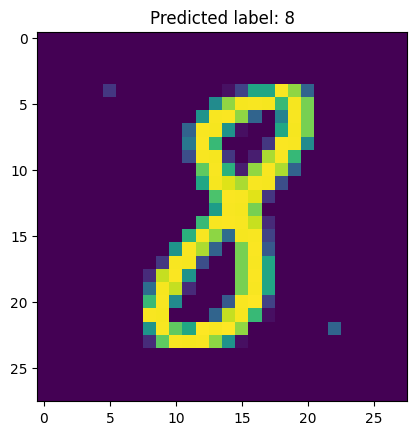

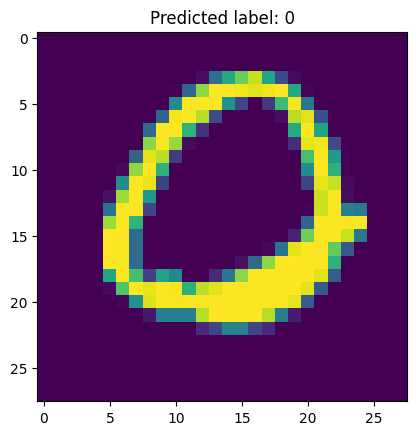

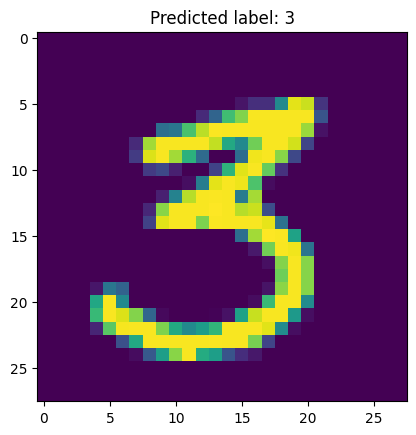

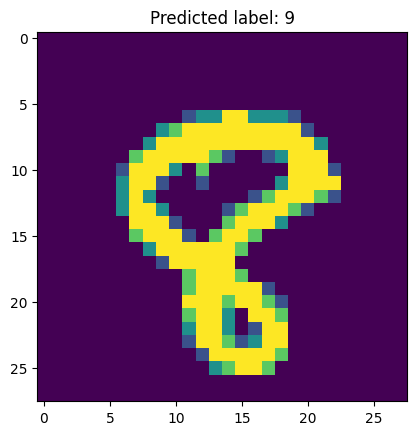

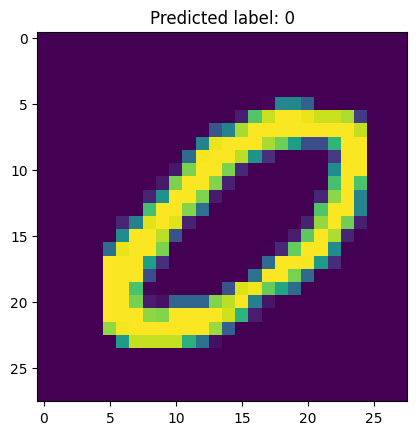

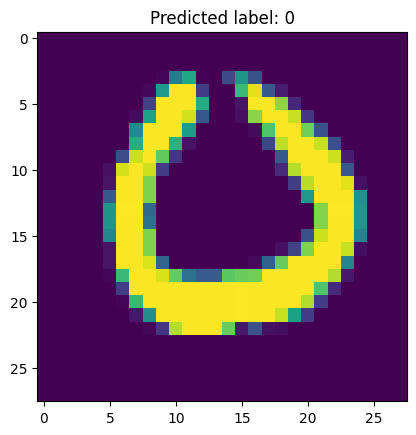

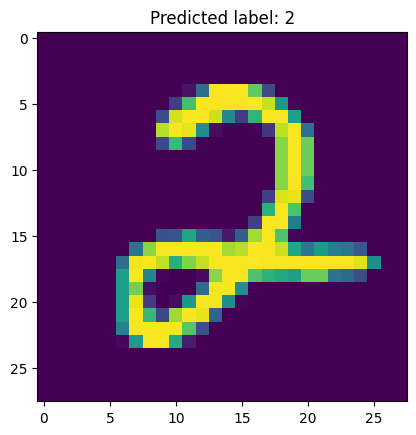

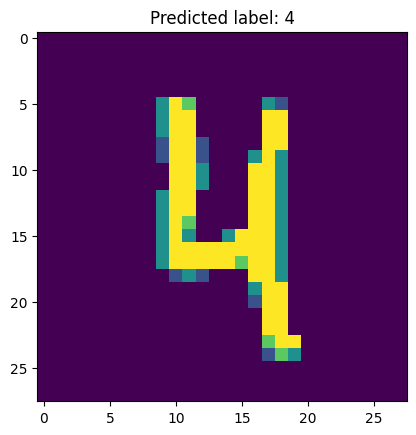

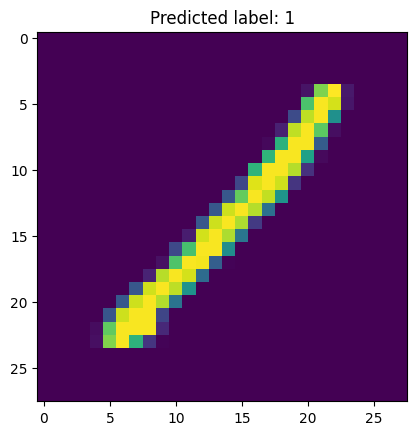

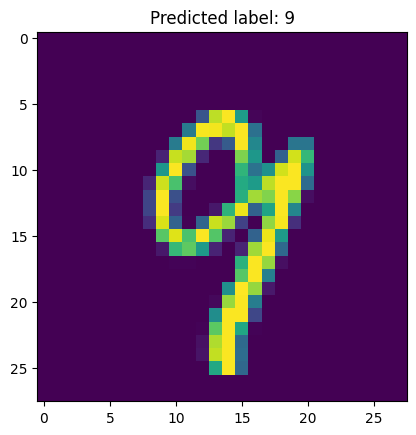

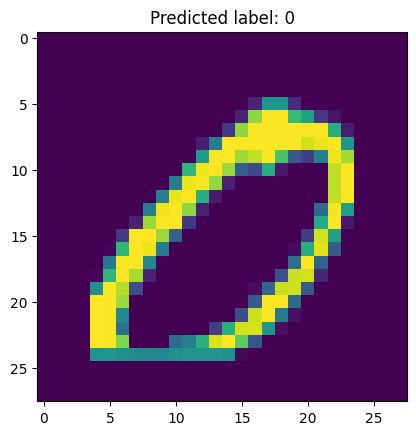

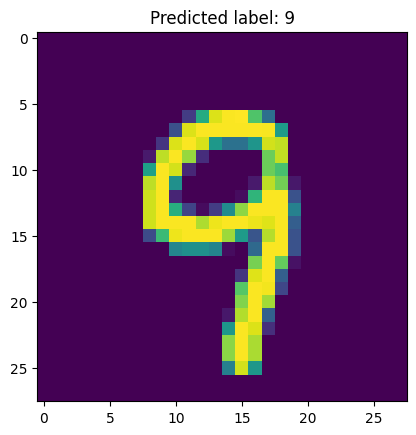

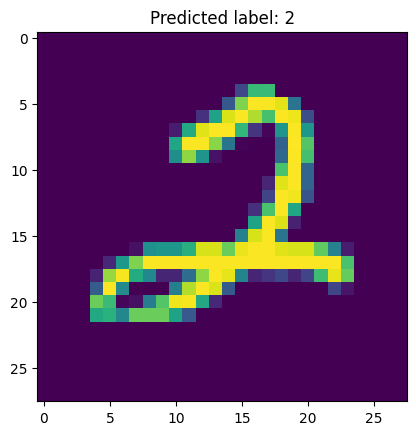

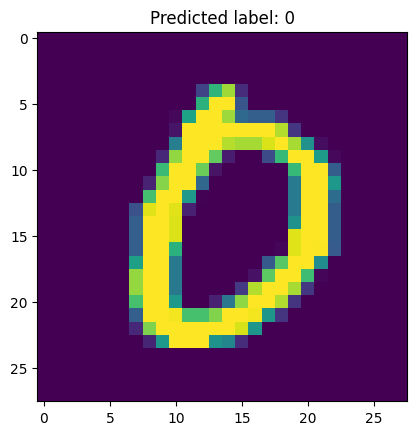

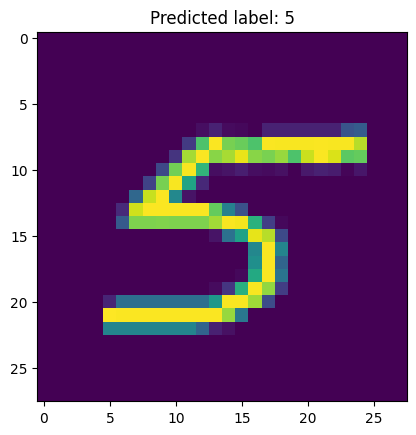

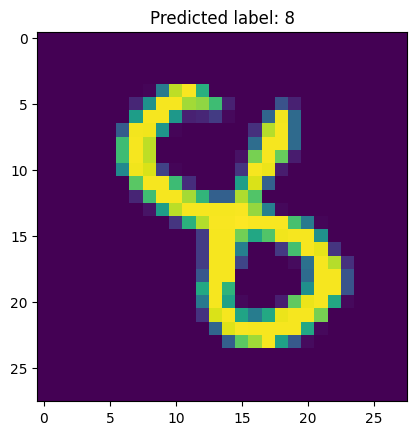

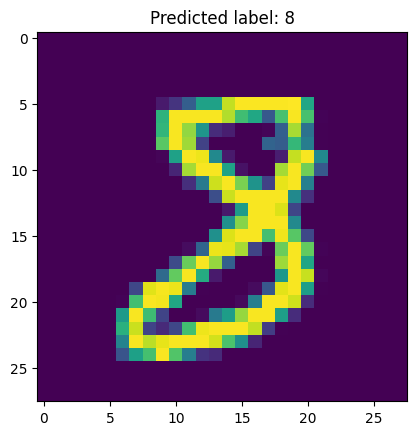

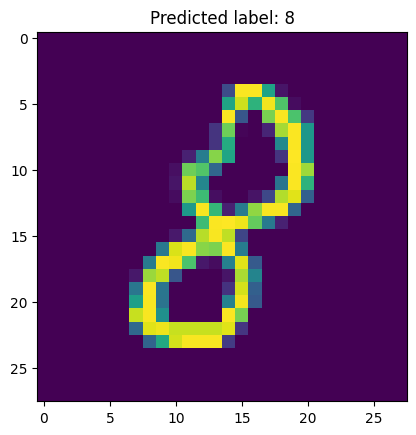

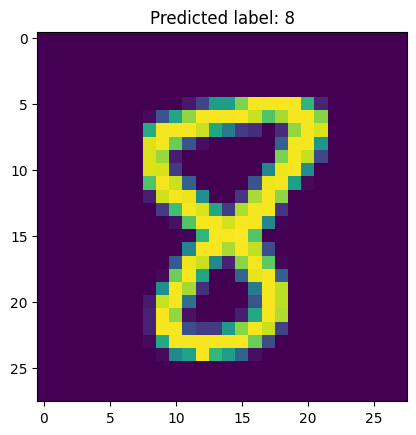

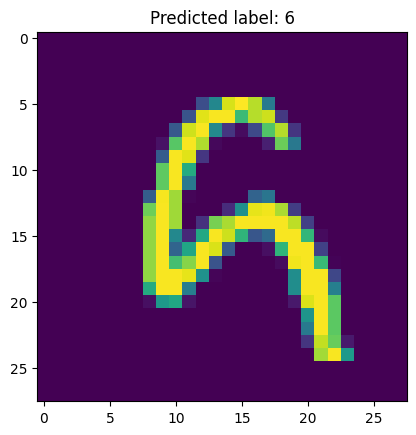

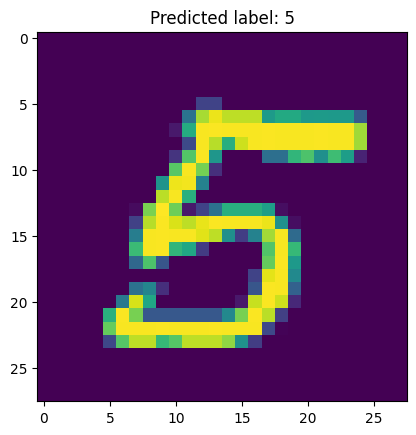

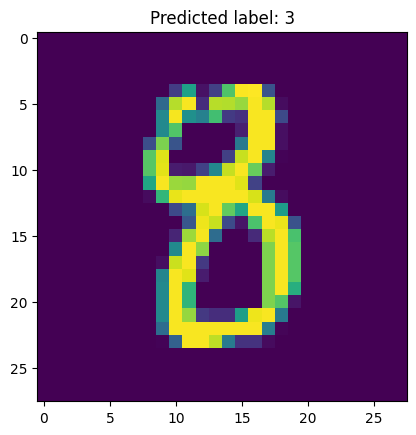

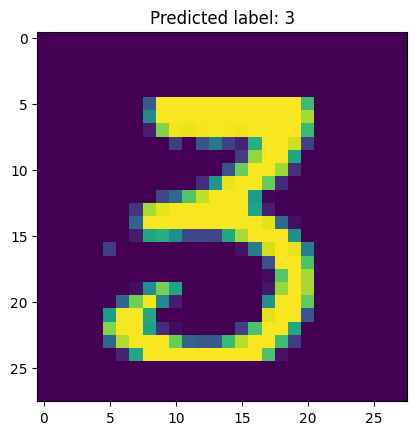

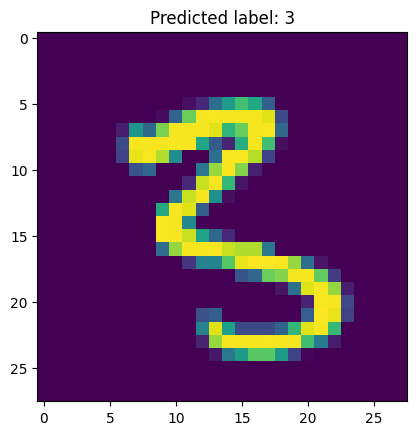

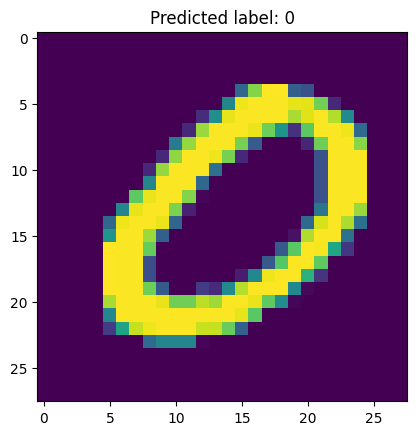

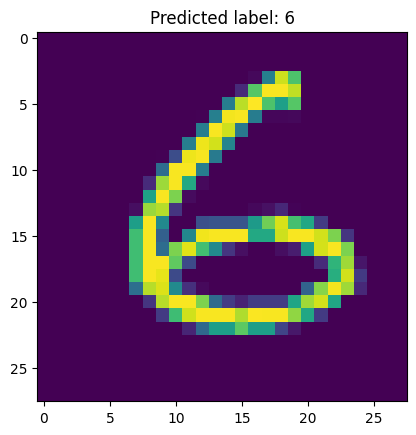

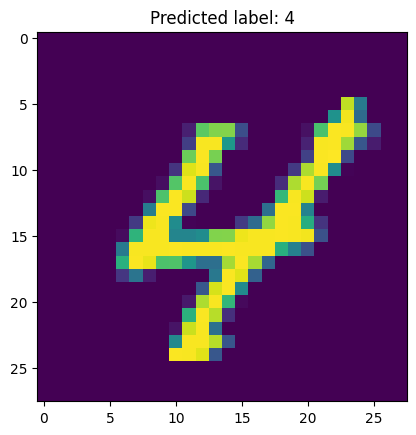

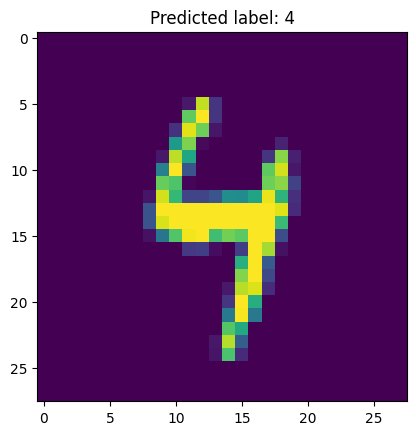

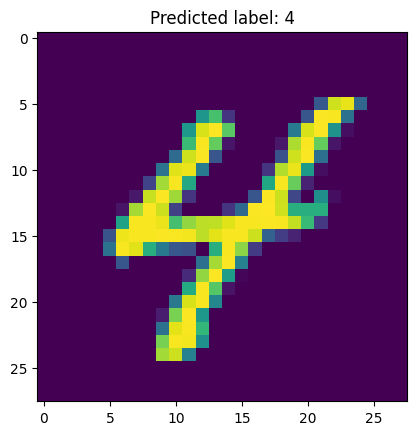

In [43]:
# You can experiment with this and find the values that makes the best predictions
K = 7

# TODO: Replace with your other sorting algorithm functions
digit_predictions = knn(X_train, y_train, X_test, K, 10, k_nearest_heapsort)

plot_images(X_test, num_images=40, digit_predictions=digit_predictions)